In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

from pathlib import Path

In [7]:
mzmine_path = Path(r'..\data\raw\metabolomics\mzmine\mzmine_metabolomics_results.csv')

In [8]:
mzm = pd.read_csv(mzmine_path)

In [9]:
for c in mzm.columns:
    print(c)

row ID
row m/z
row retention time
row comment
row number of detected peaks
20210831_KAO_HILIC_ACN_20210831232610.raw Peak status
20210831_KAO_HILIC_ACN_20210831232610.raw Peak name
20210831_KAO_HILIC_ACN_20210831232610.raw Peak m/z
20210831_KAO_HILIC_ACN_20210831232610.raw Peak RT
20210831_KAO_HILIC_ACN_20210831232610.raw Peak height
20210831_KAO_HILIC_ACN_20210831232610.raw Peak area
20210831_KAO_HILIC_ACN_20210831232610.raw Peak charge
20210831_KAO_HILIC_ACN_20210831232610.raw Peak # data points
20210831_KAO_HILIC_ACN_20210831232610.raw Peak FWHM
20210831_KAO_HILIC_extraction_blank_1.raw Peak status
20210831_KAO_HILIC_extraction_blank_1.raw Peak name
20210831_KAO_HILIC_extraction_blank_1.raw Peak m/z
20210831_KAO_HILIC_extraction_blank_1.raw Peak RT
20210831_KAO_HILIC_extraction_blank_1.raw Peak height
20210831_KAO_HILIC_extraction_blank_1.raw Peak area
20210831_KAO_HILIC_extraction_blank_1.raw Peak charge
20210831_KAO_HILIC_extraction_blank_1.raw Peak # data points
20210831_KAO_HILI

In [114]:
mzm

,row ID,row m/z,row retention time,row comment,row number of detected peaks,20210831_KAO_HILIC_ACN_20210831232610.raw Peak status,20210831_KAO_HILIC_ACN_20210831232610.raw Peak name,20210831_KAO_HILIC_ACN_20210831232610.raw Peak m/z,20210831_KAO_HILIC_ACN_20210831232610.raw Peak RT,20210831_KAO_HILIC_ACN_20210831232610.raw Peak height,...,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak height,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak area,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak # data points,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak FWHM,Unnamed: 608,row mean,row med,row min,row max
0,1,212.094059,0.141431,NaN,7,DETECTED,212.0953 m/z @0.01 [20210831_KAO_HILIC_ACN_202...,212.095337,0.006412,8.551200e+06,...,4.732164e+06,9.844323e+06,0,3,0.068942,NaN,9.386627e+06,9.940511e+06,0.0,6.359610e+07
1,2,212.095065,5.682191,NaN,58,DETECTED,212.0952 m/z @5.64 [20210831_KAO_HILIC_ACN_202...,212.095184,5.637853,7.829486e+06,...,3.153681e+06,6.483378e+06,0,3,0.068433,NaN,2.464259e+06,0.000000e+00,0.0,1.726813e+07
2,3,212.095015,5.876133,NaN,54,DETECTED,212.0952 m/z @5.90 [20210831_KAO_HILIC_ACN_202...,212.095200,5.904295,7.664947e+06,...,2.680382e+06,0.000000e+00,0,1,NaN,NaN,2.085755e+06,0.000000e+00,0.0,7.079901e+06
3,4,157.975636,1.116264,NaN,1,DETECTED,157.9749 m/z @1.12 [20210831_KAO_HILIC_ACN_202...,157.974884,1.121741,7.424362e+06,...,0.000000e+00,0.000000e+00,0,0,0.000000,NaN,4.653772e+03,0.000000e+00,0.0,8.626878e+04
4,5,212.094542,4.748643,NaN,36,DETECTED,212.0952 m/z @4.77 [20210831_KAO_HILIC_ACN_202...,212.095200,4.766154,7.399678e+06,...,4.097750e+06,8.385962e+06,0,3,0.068119,NaN,7.772719e+06,8.300845e+06,0.0,5.152168e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141193,141194,239.066600,30.063733,NaN,1,ESTIMATED,239.0641 m/z @29.96 [20210831_KAO_HILIC_ACN_20...,239.064138,29.963367,1.040644e+04,...,1.008276e+04,0.000000e+00,0,1,NaN,NaN,4.591227e+04,4.598579e+04,0.0,7.494668e+04
141194,141195,88.043434,18.084582,NaN,1,ESTIMATED,88.0433 m/z @17.93 [20210831_KAO_HILIC_ACN_202...,88.043287,17.929766,1.344959e+04,...,1.005735e+04,0.000000e+00,0,1,NaN,NaN,3.790695e+04,3.400182e+04,0.0,1.083225e+05
141195,141196,185.096925,22.771418,NaN,1,ESTIMATED,185.0885 m/z @22.89 [20210831_KAO_HILIC_ACN_20...,185.088547,22.893893,9.572537e+03,...,1.002271e+04,0.000000e+00,0,1,NaN,NaN,4.506899e+04,4.263446e+04,0.0,1.422862e+05
141196,141197,582.375989,5.957536,NaN,1,UNKNOWN,0,0.000000,0.000000,0.000000e+00,...,1.001299e+04,0.000000e+00,0,1,NaN,NaN,1.344470e+04,1.487911e+04,0.0,4.664719e+04


In [15]:
mzm.filter(regex='status').apply(pd.value_counts)

,20210831_KAO_HILIC_ACN_20210831232610.raw Peak status,20210831_KAO_HILIC_extraction_blank_1.raw Peak status,20210831_KAO_HILIC_human_plasma_1.raw Peak status,20210831_KAO_HILIC_human_plasma_4.raw Peak status,20210831_KAO_HILIC_human_plasma_2.raw Peak status,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG.raw Peak status,20210831_KAO_HILIC_T112M_20210330_8wk_RBG.raw Peak status,20210831_KAO_HILIC_human_plasma_3.raw Peak status,20210831_KAO_HILIC_T1060M_20210329_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1060M_20210405_10wk_FBG.raw Peak status,...,20210831_KAO_HILIC_T1101M_20210327_8wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210406_9wk_RBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210410_10wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210413_10wk_RBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210410_10wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210402_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak status
ESTIMATED,96656,97726,98993,98205,99105,98877,97802,99260,96996,100550,...,98262,101857,99411,99346,100229,100764,96353,99447,100964,100095
DETECTED,27943,31724,32474,34452,33842,35326,36451,33314,37548,33802,...,37425,32451,34965,34770,34072,34721,38028,36457,35098,34593
UNKNOWN,16599,11748,9731,8541,8251,6995,6945,8624,6654,6846,...,5511,6890,6822,7082,6897,5713,6817,5294,5136,6510


In [19]:
mzm.filter(regex='status')

,20210831_KAO_HILIC_ACN_20210831232610.raw Peak status,20210831_KAO_HILIC_extraction_blank_1.raw Peak status,20210831_KAO_HILIC_human_plasma_1.raw Peak status,20210831_KAO_HILIC_human_plasma_4.raw Peak status,20210831_KAO_HILIC_human_plasma_2.raw Peak status,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG.raw Peak status,20210831_KAO_HILIC_T112M_20210330_8wk_RBG.raw Peak status,20210831_KAO_HILIC_human_plasma_3.raw Peak status,20210831_KAO_HILIC_T1060M_20210329_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1060M_20210405_10wk_FBG.raw Peak status,...,20210831_KAO_HILIC_T1101M_20210327_8wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210406_9wk_RBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210410_10wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210413_10wk_RBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210410_10wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210402_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak status
0,DETECTED,DETECTED,DETECTED,ESTIMATED,ESTIMATED,DETECTED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,...,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED
1,DETECTED,DETECTED,DETECTED,DETECTED,ESTIMATED,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,...,DETECTED,DETECTED,DETECTED,ESTIMATED,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,ESTIMATED
2,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,...,ESTIMATED,DETECTED,ESTIMATED,DETECTED,DETECTED,DETECTED,DETECTED,DETECTED,ESTIMATED,DETECTED
3,DETECTED,ESTIMATED,ESTIMATED,UNKNOWN,UNKNOWN,ESTIMATED,UNKNOWN,ESTIMATED,ESTIMATED,UNKNOWN,...,ESTIMATED,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
4,DETECTED,DETECTED,DETECTED,DETECTED,ESTIMATED,DETECTED,DETECTED,ESTIMATED,ESTIMATED,ESTIMATED,...,ESTIMATED,ESTIMATED,ESTIMATED,DETECTED,DETECTED,DETECTED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141193,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,...,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,DETECTED
141194,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,...,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,DETECTED
141195,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,...,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,ESTIMATED,DETECTED
141196,UNKNOWN,UNKNOWN,UNKNOWN,ESTIMATED,UNKNOWN,UNKNOWN,ESTIMATED,ESTIMATED,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,ESTIMATED,ESTIMATED,ESTIMATED,UNKNOWN,ESTIMATED,UNKNOWN,ESTIMATED,DETECTED


In [29]:
mzm['row mean'] = mzm.filter(regex='area').mean(axis=1)
mzm['row med'] = mzm.filter(regex='area').median(axis=1)
mzm['row min'] = mzm.filter(regex='area').min(axis=1)
mzm['row max'] = mzm.filter(regex='area').max(axis=1)

<AxesSubplot:>

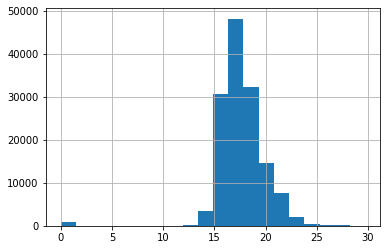

In [31]:
np.log2(mzm['row max'] + 1).hist(bins=20)

<AxesSubplot:>

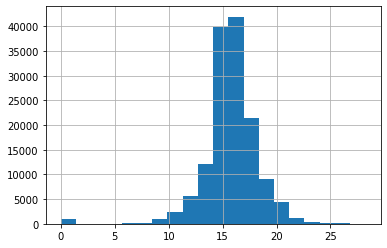

In [32]:
np.log2(mzm['row mean'] + 1).hist(bins=20)

In [33]:
mzm

,row ID,row m/z,row retention time,row comment,row number of detected peaks,20210831_KAO_HILIC_ACN_20210831232610.raw Peak status,20210831_KAO_HILIC_ACN_20210831232610.raw Peak name,20210831_KAO_HILIC_ACN_20210831232610.raw Peak m/z,20210831_KAO_HILIC_ACN_20210831232610.raw Peak RT,20210831_KAO_HILIC_ACN_20210831232610.raw Peak height,...,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak height,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak area,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak # data points,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak FWHM,Unnamed: 608,row mean,row med,row min,row max
0,1,212.094059,0.141431,NaN,7,DETECTED,212.0953 m/z @0.01 [20210831_KAO_HILIC_ACN_202...,212.095337,0.006412,8.551200e+06,...,4.732164e+06,9.844323e+06,0,3,0.068942,NaN,9.386627e+06,9.940511e+06,0.0,6.359610e+07
1,2,212.095065,5.682191,NaN,58,DETECTED,212.0952 m/z @5.64 [20210831_KAO_HILIC_ACN_202...,212.095184,5.637853,7.829486e+06,...,3.153681e+06,6.483378e+06,0,3,0.068433,NaN,2.464259e+06,0.000000e+00,0.0,1.726813e+07
2,3,212.095015,5.876133,NaN,54,DETECTED,212.0952 m/z @5.90 [20210831_KAO_HILIC_ACN_202...,212.095200,5.904295,7.664947e+06,...,2.680382e+06,0.000000e+00,0,1,NaN,NaN,2.085755e+06,0.000000e+00,0.0,7.079901e+06
3,4,157.975636,1.116264,NaN,1,DETECTED,157.9749 m/z @1.12 [20210831_KAO_HILIC_ACN_202...,157.974884,1.121741,7.424362e+06,...,0.000000e+00,0.000000e+00,0,0,0.000000,NaN,4.653772e+03,0.000000e+00,0.0,8.626878e+04
4,5,212.094542,4.748643,NaN,36,DETECTED,212.0952 m/z @4.77 [20210831_KAO_HILIC_ACN_202...,212.095200,4.766154,7.399678e+06,...,4.097750e+06,8.385962e+06,0,3,0.068119,NaN,7.772719e+06,8.300845e+06,0.0,5.152168e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141193,141194,239.066600,30.063733,NaN,1,ESTIMATED,239.0641 m/z @29.96 [20210831_KAO_HILIC_ACN_20...,239.064138,29.963367,1.040644e+04,...,1.008276e+04,0.000000e+00,0,1,NaN,NaN,4.591227e+04,4.598579e+04,0.0,7.494668e+04
141194,141195,88.043434,18.084582,NaN,1,ESTIMATED,88.0433 m/z @17.93 [20210831_KAO_HILIC_ACN_202...,88.043287,17.929766,1.344959e+04,...,1.005735e+04,0.000000e+00,0,1,NaN,NaN,3.790695e+04,3.400182e+04,0.0,1.083225e+05
141195,141196,185.096925,22.771418,NaN,1,ESTIMATED,185.0885 m/z @22.89 [20210831_KAO_HILIC_ACN_20...,185.088547,22.893893,9.572537e+03,...,1.002271e+04,0.000000e+00,0,1,NaN,NaN,4.506899e+04,4.263446e+04,0.0,1.422862e+05
141196,141197,582.375989,5.957536,NaN,1,UNKNOWN,0,0.000000,0.000000,0.000000e+00,...,1.001299e+04,0.000000e+00,0,1,NaN,NaN,1.344470e+04,1.487911e+04,0.0,4.664719e+04


<AxesSubplot:>

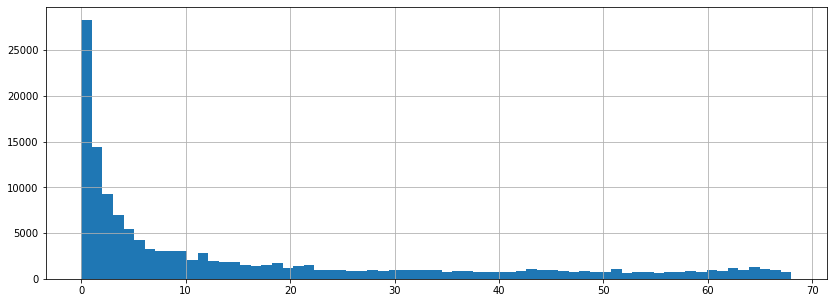

In [48]:
mzm['row number of detected peaks'].hist(bins=67, figsize=(14, 5), range=(0, 68))

In [51]:
mzm

,row ID,row m/z,row retention time,row comment,row number of detected peaks,20210831_KAO_HILIC_ACN_20210831232610.raw Peak status,20210831_KAO_HILIC_ACN_20210831232610.raw Peak name,20210831_KAO_HILIC_ACN_20210831232610.raw Peak m/z,20210831_KAO_HILIC_ACN_20210831232610.raw Peak RT,20210831_KAO_HILIC_ACN_20210831232610.raw Peak height,...,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak height,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak area,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak # data points,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak FWHM,Unnamed: 608,row mean,row med,row min,row max
0,1,212.094059,0.141431,NaN,7,DETECTED,212.0953 m/z @0.01 [20210831_KAO_HILIC_ACN_202...,212.095337,0.006412,8.551200e+06,...,4.732164e+06,9.844323e+06,0,3,0.068942,NaN,9.386627e+06,9.940511e+06,0.0,6.359610e+07
1,2,212.095065,5.682191,NaN,58,DETECTED,212.0952 m/z @5.64 [20210831_KAO_HILIC_ACN_202...,212.095184,5.637853,7.829486e+06,...,3.153681e+06,6.483378e+06,0,3,0.068433,NaN,2.464259e+06,0.000000e+00,0.0,1.726813e+07
2,3,212.095015,5.876133,NaN,54,DETECTED,212.0952 m/z @5.90 [20210831_KAO_HILIC_ACN_202...,212.095200,5.904295,7.664947e+06,...,2.680382e+06,0.000000e+00,0,1,NaN,NaN,2.085755e+06,0.000000e+00,0.0,7.079901e+06
3,4,157.975636,1.116264,NaN,1,DETECTED,157.9749 m/z @1.12 [20210831_KAO_HILIC_ACN_202...,157.974884,1.121741,7.424362e+06,...,0.000000e+00,0.000000e+00,0,0,0.000000,NaN,4.653772e+03,0.000000e+00,0.0,8.626878e+04
4,5,212.094542,4.748643,NaN,36,DETECTED,212.0952 m/z @4.77 [20210831_KAO_HILIC_ACN_202...,212.095200,4.766154,7.399678e+06,...,4.097750e+06,8.385962e+06,0,3,0.068119,NaN,7.772719e+06,8.300845e+06,0.0,5.152168e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141193,141194,239.066600,30.063733,NaN,1,ESTIMATED,239.0641 m/z @29.96 [20210831_KAO_HILIC_ACN_20...,239.064138,29.963367,1.040644e+04,...,1.008276e+04,0.000000e+00,0,1,NaN,NaN,4.591227e+04,4.598579e+04,0.0,7.494668e+04
141194,141195,88.043434,18.084582,NaN,1,ESTIMATED,88.0433 m/z @17.93 [20210831_KAO_HILIC_ACN_202...,88.043287,17.929766,1.344959e+04,...,1.005735e+04,0.000000e+00,0,1,NaN,NaN,3.790695e+04,3.400182e+04,0.0,1.083225e+05
141195,141196,185.096925,22.771418,NaN,1,ESTIMATED,185.0885 m/z @22.89 [20210831_KAO_HILIC_ACN_20...,185.088547,22.893893,9.572537e+03,...,1.002271e+04,0.000000e+00,0,1,NaN,NaN,4.506899e+04,4.263446e+04,0.0,1.422862e+05
141196,141197,582.375989,5.957536,NaN,1,UNKNOWN,0,0.000000,0.000000,0.000000e+00,...,1.001299e+04,0.000000e+00,0,1,NaN,NaN,1.344470e+04,1.487911e+04,0.0,4.664719e+04


In [108]:
data = mzm.filter(regex='row|status|area|data points|charge')
data

,row ID,row m/z,row retention time,row comment,row number of detected peaks,20210831_KAO_HILIC_ACN_20210831232610.raw Peak status,20210831_KAO_HILIC_ACN_20210831232610.raw Peak area,20210831_KAO_HILIC_ACN_20210831232610.raw Peak charge,20210831_KAO_HILIC_ACN_20210831232610.raw Peak # data points,20210831_KAO_HILIC_extraction_blank_1.raw Peak status,...,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw Peak charge,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw Peak # data points,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak area,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak # data points,row mean,row med,row min,row max
0,1,212.094059,0.141431,NaN,7,DETECTED,0.000000,1,1,DETECTED,...,0,3,ESTIMATED,9.844323e+06,0,3,9.386627e+06,9.940511e+06,0.0,6.359610e+07
1,2,212.095065,5.682191,NaN,58,DETECTED,0.000000,1,1,DETECTED,...,0,1,ESTIMATED,6.483378e+06,0,3,2.464259e+06,0.000000e+00,0.0,1.726813e+07
2,3,212.095015,5.876133,NaN,54,DETECTED,0.000000,1,1,DETECTED,...,0,3,DETECTED,0.000000e+00,0,1,2.085755e+06,0.000000e+00,0.0,7.079901e+06
3,4,157.975636,1.116264,NaN,1,DETECTED,0.000000,1,1,ESTIMATED,...,0,0,UNKNOWN,0.000000e+00,0,0,4.653772e+03,0.000000e+00,0.0,8.626878e+04
4,5,212.094542,4.748643,NaN,36,DETECTED,0.000000,1,1,DETECTED,...,0,3,ESTIMATED,8.385962e+06,0,3,7.772719e+06,8.300845e+06,0.0,5.152168e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141193,141194,239.066600,30.063733,NaN,1,ESTIMATED,20355.612316,0,3,ESTIMATED,...,0,3,DETECTED,0.000000e+00,0,1,4.591227e+04,4.598579e+04,0.0,7.494668e+04
141194,141195,88.043434,18.084582,NaN,1,ESTIMATED,40810.678028,0,3,ESTIMATED,...,0,4,DETECTED,0.000000e+00,0,1,3.790695e+04,3.400182e+04,0.0,1.083225e+05
141195,141196,185.096925,22.771418,NaN,1,ESTIMATED,15542.508353,0,3,ESTIMATED,...,0,3,DETECTED,0.000000e+00,0,1,4.506899e+04,4.263446e+04,0.0,1.422862e+05
141196,141197,582.375989,5.957536,NaN,1,UNKNOWN,0.000000,0,0,UNKNOWN,...,0,3,DETECTED,0.000000e+00,0,1,1.344470e+04,1.487911e+04,0.0,4.664719e+04


In [113]:
filt = data.loc[(data['row number of detected peaks'] > 20) & \
                (data['row mean'] > 5e5) & \
                (data['row retention time'] < 20)]
# detected_status = filt.sort_values('row retention time').set_index('row retention time').filter(regex='status')
# detected_status = detected_status.astype('category')
# detected_status
filt.filter(regex='charge')

,20210831_KAO_HILIC_ACN_20210831232610.raw Peak charge,20210831_KAO_HILIC_extraction_blank_1.raw Peak charge,20210831_KAO_HILIC_human_plasma_1.raw Peak charge,20210831_KAO_HILIC_human_plasma_4.raw Peak charge,20210831_KAO_HILIC_human_plasma_2.raw Peak charge,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG.raw Peak charge,20210831_KAO_HILIC_T112M_20210330_8wk_RBG.raw Peak charge,20210831_KAO_HILIC_human_plasma_3.raw Peak charge,20210831_KAO_HILIC_T1060M_20210329_9wk_FBG.raw Peak charge,20210831_KAO_HILIC_T1060M_20210405_10wk_FBG.raw Peak charge,...,20210831_KAO_HILIC_T1101M_20210327_8wk_FBG.raw Peak charge,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG.raw Peak charge,20210831_KAO_HILIC_T1101M_20210406_9wk_RBG.raw Peak charge,20210831_KAO_HILIC_T1101M_20210410_10wk_FBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210413_10wk_RBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210410_10wk_FBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210402_9wk_FBG.raw Peak charge,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw Peak charge,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak charge
1,1,0,0,0,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,1,0,1,1,0,0
4,1,1,1,0,0,1,1,0,0,0,...,0,0,0,1,1,1,0,0,0,0
9,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
12,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119544,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [102]:
detected_status.replace({'ESTIMATED':1, 'DETECTED':2, 'UNKNOWN':0})

,20210831_KAO_HILIC_ACN_20210831232610.raw Peak status,20210831_KAO_HILIC_extraction_blank_1.raw Peak status,20210831_KAO_HILIC_human_plasma_1.raw Peak status,20210831_KAO_HILIC_human_plasma_4.raw Peak status,20210831_KAO_HILIC_human_plasma_2.raw Peak status,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG.raw Peak status,20210831_KAO_HILIC_T112M_20210330_8wk_RBG.raw Peak status,20210831_KAO_HILIC_human_plasma_3.raw Peak status,20210831_KAO_HILIC_T1060M_20210329_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1060M_20210405_10wk_FBG.raw Peak status,...,20210831_KAO_HILIC_T1101M_20210327_8wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210406_9wk_RBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210410_10wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210413_10wk_RBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210410_10wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210327_8wk_FBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210402_9wk_FBG.raw Peak status,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG.raw Peak status,20210831_KAO_HILIC_T1102M_20210406_9wk_RBG.raw Peak status
row retention time,,,,,,,,,,,,,,,,,,,,,
0.039116,1,1,1,2,2,1,1,1,2,2,...,2,2,2,2,2,2,1,1,2,2
0.070708,1,1,1,2,2,1,1,1,2,2,...,2,2,2,2,2,2,1,1,2,2
0.113964,1,1,1,2,2,1,1,1,2,2,...,2,2,2,2,2,2,1,1,2,2
0.119039,2,1,1,2,2,2,2,1,1,2,...,2,1,1,2,1,2,1,2,2,2
0.126172,1,1,1,2,1,2,1,2,1,1,...,2,1,1,1,1,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.770805,2,2,2,1,1,2,2,2,1,2,...,2,2,2,1,1,2,2,2,2,2
19.820811,1,1,1,2,2,1,1,1,2,2,...,2,2,2,2,2,2,1,1,2,2
19.868750,2,2,2,1,1,2,2,2,1,2,...,2,2,2,1,1,2,2,2,2,2


<AxesSubplot:ylabel='row retention time'>

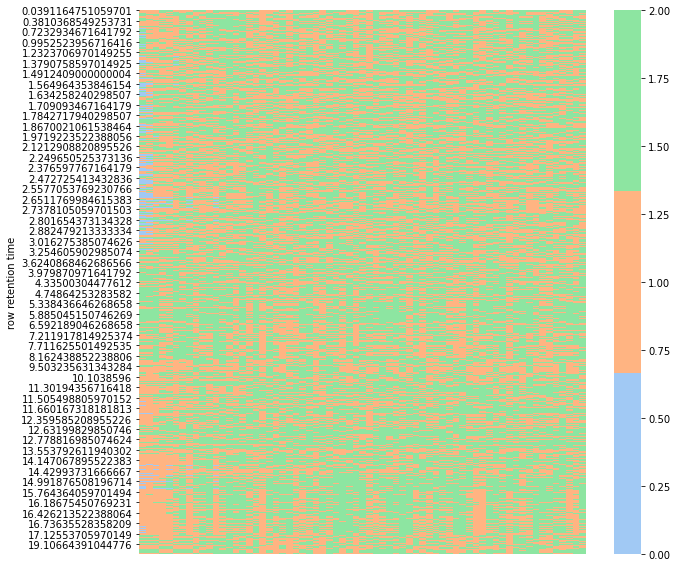

In [103]:
plt.figure(figsize = (10, 10))

cmap = sns.color_palette('pastel', 3) 

sns.heatmap(detected_status.replace({'ESTIMATED':1, 'DETECTED':2, 'UNKNOWN':0}), 
            xticklabels=False, 
            cmap=cmap)

In [64]:
filt.filter(regex='points').apply(pd.value_counts).iloc[0:20].mean(axis=1)

0       40.769231
1     2509.910448
2       28.552239
3     2357.820896
4      110.044776
5      164.880597
6       40.955224
7       64.477612
8       18.462687
9       32.850746
10       9.939394
11      18.343284
12       5.378788
13      12.388060
14       3.921875
15       8.651515
16       3.114754
17       5.727273
18       2.086207
19       3.287879
dtype: float64